In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
digimon = pd.read_csv("../datasets/DigiDB_digimonlist.csv")

In [3]:
digimon.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


## opdracht 16

## Multivariate analyses: Models

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:

features=['Lv 50 HP']

dt = DecisionTreeClassifier(max_depth= 1) # increase max_depth to see effect in the plot
dt.fit(digimon[features], digimon['Stage'])

DecisionTreeClassifier(max_depth=1)

In [6]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

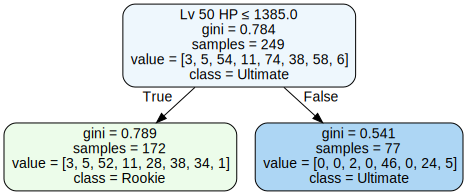

In [7]:
plot_tree_classification(dt, features, digimon.Stage.unique())

als lvl 50 hp kleiner is dan 1385 dan gaat hij naar true en dan is de class die hij krijgt Rookie. Als de lvl 50 hp groter is dan 1385, dan krijgt de class waarde de naam Ultimate.

## evaluate the model

In [8]:
predictions = dt.predict(digimon[features])

In [9]:
predictions

array(['Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Mega', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion',

In [10]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [11]:
calculate_accuracy(predictions, digimon.Stage)

0.39357429718875503

39% correct

## test/train split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
digimon_train, digimon_test = train_test_split(digimon, test_size=0.3, stratify=digimon['Stage'], random_state=42)
print(digimon_train.shape, digimon_test.shape)

(174, 13) (75, 13)


In [14]:
digimon_train.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
86,87,Stingmon,Champion,Free,Plant,8,1,1130,84,143,74,74,133
5,6,Koromon,In-Training,Free,Fire,3,0,940,52,109,93,52,76
185,186,Sakuyamon,Mega,Data,Light,18,3,990,178,94,114,188,173
13,14,Bukamon,In-Training,Free,Water,3,0,830,93,54,74,103,69
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95


In [15]:
digimon.Stage.value_counts()

Mega           74
Ultimate       58
Champion       54
Rookie         38
In-Training    11
Ultra           6
Baby            5
Armor           3
Name: Stage, dtype: int64

In [16]:
digimon_train.Stage.value_counts()

Mega           52
Ultimate       40
Champion       38
Rookie         27
In-Training     8
Ultra           4
Baby            3
Armor           2
Name: Stage, dtype: int64

In [17]:
digimon_test.Stage.value_counts()

Mega           22
Ultimate       18
Champion       16
Rookie         11
In-Training     3
Ultra           2
Baby            2
Armor           1
Name: Stage, dtype: int64

In [18]:
features= ['Lv 50 HP']
dt_classification = DecisionTreeClassifier(max_depth = 1) # Increase max_depth to see effect in the plot
dt_classification.fit(digimon_train[features], digimon_train['Stage'])

DecisionTreeClassifier(max_depth=1)

In [19]:
predictionsOnTrainset = dt_classification.predict(digimon_train[features])
predictionsOnTestset = dt_classification.predict(digimon_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, digimon_train.Stage)
accuracyTest = calculate_accuracy(predictionsOnTestset, digimon_test.Stage)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.42528735632183906
Accuracy on test set 0.32


beide accurancies zijn verschillend, ik verwachtte inderdaad dat dit verschillend zou zijn en niet hetzelfde. 

## OVERFITTING

In [20]:
features= ['Lv 50 HP']
dt_classification = DecisionTreeClassifier(max_depth = 10) # Increase max_depth to see effect in the plot
dt_classification.fit(digimon_train[features], digimon_train['Stage'])

DecisionTreeClassifier(max_depth=10)

In [21]:
predictionsOnTrainset = dt_classification.predict(digimon_train[features])
predictionsOnTestset = dt_classification.predict(digimon_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, digimon_train.Stage)
accuracyTest = calculate_accuracy(predictionsOnTestset, digimon_test.Stage)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.6609195402298851
Accuracy on test set 0.4


## accuracy veranderd als de max_depth word aangepast, training set word hoger en test set wordt lager.

## opdracht 18

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
features= ['Lv 50 HP']
dt_regression = DecisionTreeRegressor(max_depth = 1) # Increase max_depth to see effect in the plot
dt_regression.fit(digimon_train[features], digimon_train['Lv50 SP'])

DecisionTreeRegressor(max_depth=1)

In [25]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

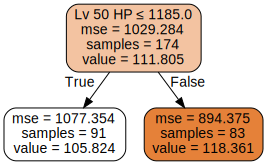

In [26]:
plot_tree_regression(dt_regression, features)

# als de lv 50 HP kleiner is dan 1185.0 dan gaan we naar true en als dit niet zo is gaan we naar false. We verwachten als het kleiner is dan 1185.0 dat de Lv 50 HP 105.824 is. 

# als de lv 50 HP groter is dan 1185.0 dan gaan we naar false en als dit niet zo is gaan we naar true. We verwachten als het groter is dan 1185.0 dat de Lv 50 HP 118.361 is. 

## evalueren model

In [27]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

## The same function but using a for-loop instead of a vectorized operation. 
# def calculate_rmse(predictions, actuals):
#    if(len(predictions) != len(actuals)):
#        raise Exception("The amount of predictions did not equal the amount of actuals")
#    
#    diffSquared = 0
#    
#    for prediction_i, actual_i in zip(predictions, actuals):
#        diffSquared += (prediction_i - actual_i)**2
#        
#    return (diffSquared/len(actuals))**(1/2)

In [28]:
predictionsOnTrainset = dt_regression.predict(digimon_train[features])
predictionsOnTestset = dt_regression.predict(digimon_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, digimon_train['Lv50 SP'])
rmseTest = calculate_rmse(predictionsOnTestset, digimon_test['Lv50 SP'])

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 31.46539272452482
RMSE on test set 33.55282399731191


rmse = root mean square error, wat is de gemiddelde fout die we gaan zien.

## Ik verwachte inderdaad dat dit anders zou zijn